# Table of Contents



# Introduction

## Project Objective

## Dataset Description

The dataset used for this analysis is sourced from Kaggle, specifically the [Dataset for Detection of Cyber-Trolls](https://www.kaggle.com/datasets/dataturks/dataset-for-detection-of-cybertrolls).

This dataset consists of tweets that have been manually classified as either aggressive (potentially from trolls) or not aggressive. 

Key features of the dataset:
- Contains 20,001 items (tweets).
- Each tweet has been manually labeled.
- The labels are categorized into two groups:
    - 1 represents Cyber-Aggressive (potentially from trolls).
    - 0 represents Non Cyber-Aggressive.

This dataset serves as a valuable resource for training a machine learning model to identify troll behavior on social media platforms, thereby aiding in online safety and content moderation efforts.

## Imports

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Initial Inspection

In [6]:
df = pd.read_json('../Data/Dataset for Detection of Cyber-Trolls.json', lines= True)

In [7]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [8]:
df.shape

(20001, 3)

In [9]:
df.isnull().sum()

content           0
annotation        0
extras        20001
dtype: int64

`extras` column is entirely null, so we will be dropping it.

In [15]:
df = df.drop(['extras'], axis=1)

After dropping the 'extras' column, we now have a dataset with two useful features: 'content' and 'annotation'. The 'content' column contains the text of the social media posts, while the 'annotation' column carries a dictionary object with 'notes' and 'label' keys. 

However, for ease of analysis, it is more convenient to have 'troll' (which indicates whether a post is made by a troll or not) as a separate column rather than embedded within 'annotation'. Hence, we extract 'label' from the 'annotation' column and add it as a new column to the dataframe.

In [10]:
# Create Binary column 'Troll'
df['Troll'] = df['annotation'].apply(lambda x: x['label'][0])

# Remove old column 'annotation' as it is entirely redundant now.
df = df.drop(['annotation'], axis=1)

Once this is done, we then count the number of each label to see the distribution of troll and non-troll posts in our dataset. The countplot visualization gives a clear picture of this distribution. The '0' label represents non-troll posts and '1' represents troll posts.

In [12]:
df['label'].value_counts()

0    12179
1     7822
Name: label, dtype: int64

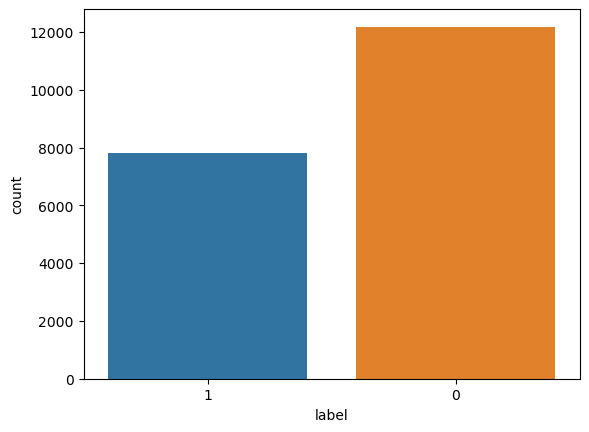

In [14]:
sns.countplot(x='label', data=df)
plt.show()